# About Naive Bayes classifiers:
Naive Bayes classifiers are a collection of classification algorithms based on Bayes’ Theorem. It is not a single algorithm but a family of algorithms where all of them share a common principle, i.e. every pair of features being classified is independent of each other.

# Problem Statement:
Prepare a classification model using Naive Bayes for salary data.

# The Salary Data-
There is two data available one is called'Salarydata-train" & other one is "Salarydata-test'.This dataset have the details of the individuals age, workclass, education, marital status, salary etc.

Will use necessary & important steps to make model by using Naive bayes classifier. Also at the end will check the probability & Accuracy, error check too.


# importing libraries

In [126]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import os
import warnings
warnings.filterwarnings('ignore')
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
from sklearn.preprocessing import RobustScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# Load The Dataset

In [235]:


SalaryTrain=pd.read_csv('C:/Users/VivekG/Desktop/My Files- Vivek/ExcelrThane/DS/Assignments/Naive Bayes/SalaryData_Train.csv')
SalaryTrain.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [236]:

SalaryTest=pd.read_csv('C:/Users/VivekG/Desktop/My Files- Vivek/ExcelrThane/DS/Assignments/Naive Bayes/SalaryData_Test.csv')
SalaryTest.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


# EDA

In [237]:

SalaryTrain.shape
SalaryTest.shape

(15060, 14)

In [238]:
SalaryTrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30161 entries, 0 to 30160
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            30161 non-null  int64 
 1   workclass      30161 non-null  object
 2   education      30161 non-null  object
 3   educationno    30161 non-null  int64 
 4   maritalstatus  30161 non-null  object
 5   occupation     30161 non-null  object
 6   relationship   30161 non-null  object
 7   race           30161 non-null  object
 8   sex            30161 non-null  object
 9   capitalgain    30161 non-null  int64 
 10  capitalloss    30161 non-null  int64 
 11  hoursperweek   30161 non-null  int64 
 12  native         30161 non-null  object
 13  Salary         30161 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.2+ MB


In [239]:
SalaryTest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15060 entries, 0 to 15059
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            15060 non-null  int64 
 1   workclass      15060 non-null  object
 2   education      15060 non-null  object
 3   educationno    15060 non-null  int64 
 4   maritalstatus  15060 non-null  object
 5   occupation     15060 non-null  object
 6   relationship   15060 non-null  object
 7   race           15060 non-null  object
 8   sex            15060 non-null  object
 9   capitalgain    15060 non-null  int64 
 10  capitalloss    15060 non-null  int64 
 11  hoursperweek   15060 non-null  int64 
 12  native         15060 non-null  object
 13  Salary         15060 non-null  object
dtypes: int64(5), object(9)
memory usage: 1.6+ MB


In [240]:
SalaryTrain.describe()

,age,educationno,capitalgain,capitalloss,hoursperweek
count,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000
mean,38.438115,10.121316,1092.044064,88.302311,40.931269
std,13.134830,2.550037,7406.466611,404.121321,11.980182
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,47.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


In [241]:
SalaryTest.describe()

,age,educationno,capitalgain,capitalloss,hoursperweek
count,15060.000000,15060.000000,15060.000000,15060.000000,15060.000000
mean,38.768327,10.112749,1120.301594,89.041899,40.951594
std,13.380676,2.558727,7703.181842,406.283245,12.062831
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,48.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,3770.000000,99.000000


# Text Preprocessing

In [242]:
# Check the Special Charachters in Dataset

In [243]:
SalaryTrain.isin(['?']).sum(axis=0)


age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [244]:
SalaryTest.isin(['?']).sum(axis=0)
print(SalaryTrain[0:5])

   age          workclass   education  educationno        maritalstatus  \
0   39          State-gov   Bachelors           13        Never-married   
1   50   Self-emp-not-inc   Bachelors           13   Married-civ-spouse   
2   38            Private     HS-grad            9             Divorced   
3   53            Private        11th            7   Married-civ-spouse   
4   28            Private   Bachelors           13   Married-civ-spouse   

           occupation    relationship    race      sex  capitalgain  \
0        Adm-clerical   Not-in-family   White     Male         2174   
1     Exec-managerial         Husband   White     Male            0   
2   Handlers-cleaners   Not-in-family   White     Male            0   
3   Handlers-cleaners         Husband   Black     Male            0   
4      Prof-specialty            Wife   Black   Female            0   

   capitalloss  hoursperweek          native  Salary  
0            0            40   United-States   <=50K  
1           

In [245]:
# Check the Categorical Variables

categorical = [var for var in SalaryTrain.columns if SalaryTrain[var].dtype=='O']
print('There are {} categorical variables\n'.format(len(categorical)))
print('The categorical variables are :\n\n', categorical)

There are 9 categorical variables

The categorical variables are :

 ['workclass', 'education', 'maritalstatus', 'occupation', 'relationship', 'race', 'sex', 'native', 'Salary']


In [246]:
# Explore categorical variables

SalaryTrain[categorical].head()

,workclass,education,maritalstatus,occupation,relationship,race,sex,native,Salary
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States,<=50K
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,<=50K
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States,<=50K
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States,<=50K
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba,<=50K


In [247]:
# Finding the missing value in Categorical variables.
SalaryTrain[categorical].isnull().sum()

workclass        0
education        0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
native           0
Salary           0
dtype: int64

In [248]:
# Word frequency in categorical variables
for var in categorical:
    print(SalaryTrain[var].value_counts())

 Private             22285
 Self-emp-not-inc     2499
 Local-gov            2067
 State-gov            1279
 Self-emp-inc         1074
 Federal-gov           943
 Without-pay            14
Name: workclass, dtype: int64
 HS-grad         9840
 Some-college    6677
 Bachelors       5044
 Masters         1627
 Assoc-voc       1307
 11th            1048
 Assoc-acdm      1008
 10th             820
 7th-8th          557
 Prof-school      542
 9th              455
 12th             377
 Doctorate        375
 5th-6th          288
 1st-4th          151
 Preschool         45
Name: education, dtype: int64
 Married-civ-spouse       14065
 Never-married             9725
 Divorced                  4214
 Separated                  939
 Widowed                    827
 Married-spouse-absent      370
 Married-AF-spouse           21
Name: maritalstatus, dtype: int64
 Prof-specialty       4038
 Craft-repair         4030
 Exec-managerial      3992
 Adm-clerical         3721
 Sales                3584
 Other

In [249]:
# Frequency distribution of Categorical Variables

for var in categorical:
    print(SalaryTrain[var].value_counts()/np.float(len(SalaryTrain)))

 Private             0.738868
 Self-emp-not-inc    0.082855
 Local-gov           0.068532
 State-gov           0.042406
 Self-emp-inc        0.035609
 Federal-gov         0.031266
 Without-pay         0.000464
Name: workclass, dtype: float64
 HS-grad         0.326249
 Some-college    0.221379
 Bachelors       0.167236
 Masters         0.053944
 Assoc-voc       0.043334
 11th            0.034747
 Assoc-acdm      0.033421
 10th            0.027187
 7th-8th         0.018468
 Prof-school     0.017970
 9th             0.015086
 12th            0.012500
 Doctorate       0.012433
 5th-6th         0.009549
 1st-4th         0.005006
 Preschool       0.001492
Name: education, dtype: float64
 Married-civ-spouse       0.466331
 Never-married            0.322436
 Divorced                 0.139717
 Separated                0.031133
 Widowed                  0.027420
 Married-spouse-absent    0.012267
 Married-AF-spouse        0.000696
Name: maritalstatus, dtype: float64
 Prof-specialty       0.13388

In [250]:
# Check lables in Workclass column
SalaryTrain.workclass.unique()

array([' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
       ' Local-gov', ' Self-emp-inc', ' Without-pay'], dtype=object)

In [251]:
# Find frequency distribution in workclass column.
SalaryTrain.workclass.value_counts()

 Private             22285
 Self-emp-not-inc     2499
 Local-gov            2067
 State-gov            1279
 Self-emp-inc         1074
 Federal-gov           943
 Without-pay            14
Name: workclass, dtype: int64

In [252]:
# Check lables in occupation column
SalaryTrain.occupation.unique()

array([' Adm-clerical', ' Exec-managerial', ' Handlers-cleaners',
       ' Prof-specialty', ' Other-service', ' Sales', ' Transport-moving',
       ' Farming-fishing', ' Machine-op-inspct', ' Tech-support',
       ' Craft-repair', ' Protective-serv', ' Armed-Forces',
       ' Priv-house-serv'], dtype=object)

In [253]:
# Find frequency distribution in occupation column.
SalaryTrain.occupation.value_counts()

 Prof-specialty       4038
 Craft-repair         4030
 Exec-managerial      3992
 Adm-clerical         3721
 Sales                3584
 Other-service        3212
 Machine-op-inspct    1965
 Transport-moving     1572
 Handlers-cleaners    1350
 Farming-fishing       989
 Tech-support          912
 Protective-serv       644
 Priv-house-serv       143
 Armed-Forces            9
Name: occupation, dtype: int64

In [254]:
# Check lables in native/country  column
SalaryTrain.native.unique()

array([' United-States', ' Cuba', ' Jamaica', ' India', ' Mexico',
       ' Puerto-Rico', ' Honduras', ' England', ' Canada', ' Germany',
       ' Iran', ' Philippines', ' Poland', ' Columbia', ' Cambodia',
       ' Thailand', ' Ecuador', ' Laos', ' Taiwan', ' Haiti', ' Portugal',
       ' Dominican-Republic', ' El-Salvador', ' France', ' Guatemala',
       ' Italy', ' China', ' South', ' Japan', ' Yugoslavia', ' Peru',
       ' Outlying-US(Guam-USVI-etc)', ' Scotland', ' Trinadad&Tobago',
       ' Greece', ' Nicaragua', ' Vietnam', ' Hong', ' Ireland',
       ' Hungary'], dtype=object)

In [255]:
# Find frequency distribution in native/country column.
SalaryTrain.native.value_counts()

 United-States                 27504
 Mexico                          610
 Philippines                     188
 Germany                         128
 Puerto-Rico                     109
 Canada                          107
 India                           100
 El-Salvador                     100
 Cuba                             92
 England                          86
 Jamaica                          80
 South                            71
 China                            68
 Italy                            68
 Dominican-Republic               67
 Vietnam                          64
 Guatemala                        63
 Japan                            59
 Poland                           56
 Columbia                         56
 Iran                             42
 Taiwan                           42
 Haiti                            42
 Portugal                         34
 Nicaragua                        33
 Peru                             30
 Greece                           29
 

In [256]:
# Check the  No. of Lables in categorical variables
for var in categorical:
    print(var, "contains", len(SalaryTrain[var].unique()),'lables')

workclass contains 7 lables
education contains 16 lables
maritalstatus contains 7 lables
occupation contains 14 lables
relationship contains 6 lables
race contains 5 lables
sex contains 2 lables
native contains 40 lables
Salary contains 2 lables


In [257]:
# Find numerical variable 
numerical = [var for var in SalaryTrain.columns if SalaryTrain[var].dtype!='O']

print('There are {} numerical variables\n'.format(len(numerical)))

print('The numerical variables are :', numerical)

There are 5 numerical variables

The numerical variables are : ['age', 'educationno', 'capitalgain', 'capitalloss', 'hoursperweek']


In [258]:

SalaryTrain[numerical].head()

,age,educationno,capitalgain,capitalloss,hoursperweek
0,39,13,2174,0,40
1,50,13,0,0,13
2,38,9,0,0,40
3,53,7,0,0,40
4,28,13,0,0,40


# Visualization


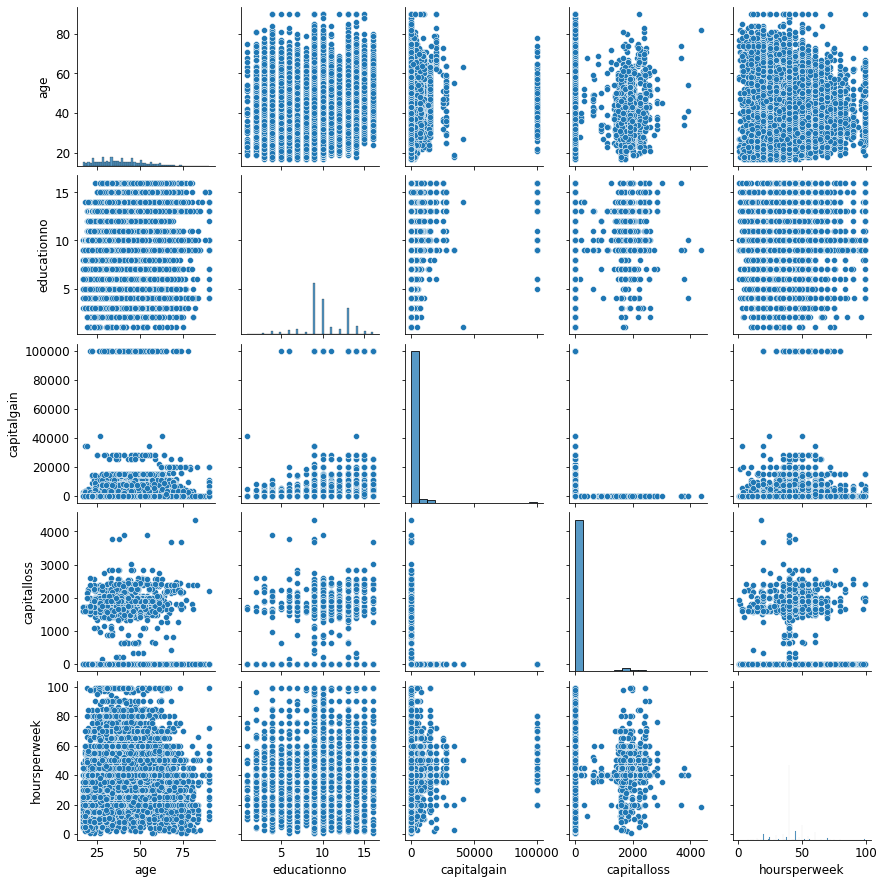

In [259]:
sns.pairplot(SalaryTrain)

# Feature Vector & Target Variable

In [260]:

X=SalaryTrain.drop(['Salary'],axis=1)
Y=SalaryTrain['Salary']

In [261]:
# Splitting X & Y into training and test dataset
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=0)

In [262]:
#X_Train & Test Shape
X_test.shape,X_test.shape

((9049, 13), (9049, 13))

# Feature engineering

In [263]:
# Datatype of X_Train & Test
X_test.dtypes,X_test.dtypes

(age               int64
 workclass        object
 education        object
 educationno       int64
 maritalstatus    object
 occupation       object
 relationship     object
 race             object
 sex              object
 capitalgain       int64
 capitalloss       int64
 hoursperweek      int64
 native           object
 dtype: object,
 age               int64
 workclass        object
 education        object
 educationno       int64
 maritalstatus    object
 occupation       object
 relationship     object
 race             object
 sex              object
 capitalgain       int64
 capitalloss       int64
 hoursperweek      int64
 native           object
 dtype: object)

In [264]:
# View Categorical Variables.
categorical = [col for col in X_train.columns if X_train[col].dtypes == 'O']
categorical

['workclass',
 'education',
 'maritalstatus',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native']

In [265]:
# View Numerical variables
numerical = [col for col in X_train.columns if X_train[col].dtypes != 'O']
numerical

['age', 'educationno', 'capitalgain', 'capitalloss', 'hoursperweek']

In [266]:
# Percentage of missing values in categorical wariable in X_train.
X_train[categorical].isnull().mean()

workclass        0.0
education        0.0
maritalstatus    0.0
occupation       0.0
relationship     0.0
race             0.0
sex              0.0
native           0.0
dtype: float64

In [267]:
# Categorcial variables with missing data
for col in categorical:
    if X_train[col].isnull().mean()>0:
        print(col,(X_train[col].isnull().mean()))

In [268]:
# Impute missing categorical variablels with most frequent values.
for df1 in [X_train,X_test]:
    df1['workclass'].fillna(X_train['workclass'].mode()[0],inplace=True)
    df1['occupation'].fillna(X_train['occupation'].mode()[0],inplace=True)
    df1['native'].fillna(X_train['native'].mode()[0],inplace=True)

In [269]:
# Missing value in X_train(categorical)
X_train[categorical].isnull().sum()

workclass        0
education        0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
native           0
dtype: int64

In [270]:
# Print X_train categorical variable
categorical
X_train[categorical].head()

,workclass,education,maritalstatus,occupation,relationship,race,sex,native
8166,Local-gov,Some-college,Married-civ-spouse,Protective-serv,Husband,White,Male,United-States
7138,Private,Some-college,Never-married,Other-service,Own-child,White,Male,United-States
437,Private,HS-grad,Never-married,Transport-moving,Not-in-family,White,Male,United-States
5436,Private,HS-grad,Married-civ-spouse,Craft-repair,Husband,White,Male,United-States
6541,Self-emp-not-inc,HS-grad,Married-civ-spouse,Tech-support,Husband,White,Male,United-States


# Importing Category encoders

In [271]:
!pip install category_encoders

In [272]:

import category_encoders as ce

# encode with OHE(one hot encoding)

encoder=ce.OneHotEncoder(cols=['workclass','education','maritalstatus','occupation','relationship','race','sex','native'])

In [273]:
X_train=encoder.fit_transform(X_train)
X_test=encoder.fit_transform(X_test)
X_train.head()

,age,workclass_1,workclass_2,workclass_3,workclass_4,workclass_5,workclass_6,workclass_7,education_1,education_2,...,native_31,native_32,native_33,native_34,native_35,native_36,native_37,native_38,native_39,native_40
8166,54,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
7138,21,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
437,30,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
5436,42,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
6541,37,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [274]:
X_train.shape
X_test.shape

(9049, 102)

# Scale the data

In [275]:
colm=X_train.columns

In [276]:
scaler=RobustScaler()

X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [277]:
X_train=pd.DataFrame(X_train,columns=[colm])
X_test=pd.DataFrame(X_test,columns=[colm])
X_train.head()

,age,workclass_1,workclass_2,workclass_3,workclass_4,workclass_5,workclass_6,workclass_7,education_1,education_2,...,native_31,native_32,native_33,native_34,native_35,native_36,native_37,native_38,native_39,native_40
0,0.894737,1.0,-1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-0.842105,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.368421,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.263158,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000000,0.0,-1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Create Model- Training Set

In [278]:
# Using Gaussian Naive Bayes classifier on training data.

classifier_gb=GaussianNB()

In [279]:
# Fit the Model

classifier_gb.fit(X_train,Y_train)
y_pred=classifier_gb.predict(X_test)
y_pred

array([' >50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' <=50K'],
      dtype='<U6')

# Accuracy Check


In [280]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(Y_test,y_pred)))

y_pred_train=classifier_gb.predict(X_train)

y_pred_train

Training-set accuracy score: 0.7906


array([' >50K', ' <=50K', ' <=50K', ..., ' <=50K', ' >50K', ' <=50K'],
      dtype='<U6')

In [281]:
print('Training Set Accuracy Score:{0:0.4f}'.format(accuracy_score(Y_train,y_pred_train)))

Training Set Accuracy Score:0.8023


# Training & Test Accuracy Score

In [282]:


print('Training set score: {:.4f}'.format(classifier_gb.score(X_train, Y_train)))

print('Test set score: {:.4f}'.format(classifier_gb.score(X_test, Y_test)))

Training set score: 0.8023
Test set score: 0.7906


# Implies Confusion Matrix

In [283]:

from sklearn.metrics import confusion_matrix

co = confusion_matrix(Y_test, y_pred)

print('Confusion matrix\n\n', co)

print('\nTrue Positives(TP) = ', co[0,0])

print('\nTrue Negatives(TN) = ', co[1,1])

print('\nFalse Positives(FP) = ', co[0,1])

print('\nFalse Negatives(FN) = ', co[1,0])

Confusion matrix

 [[6551  247]
 [1648  603]]

True Positives(TP) =  6551

True Negatives(TN) =  603

False Positives(FP) =  247

False Negatives(FN) =  1648


<AxesSubplot:>

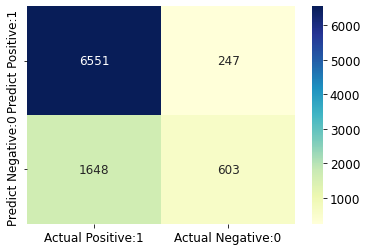

In [284]:
# Visualize Confusion Matrix

cm_matrix = pd.DataFrame(data=co, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

# Classification metrices

In [285]:
from sklearn.metrics import classification_report

print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

       <=50K       0.80      0.96      0.87      6798
        >50K       0.71      0.27      0.39      2251

    accuracy                           0.79      9049
   macro avg       0.75      0.62      0.63      9049
weighted avg       0.78      0.79      0.75      9049



# Classification accuracy

In [286]:
TP = co[0,0]
TN = co[1,1]
FP = co[0,1]
FN = co[1,0]

In [287]:
classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)

print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))

Classification accuracy : 0.7906


# Classification Error check

In [288]:
classification_error = (FP + FN) / float(TP + TN + FP + FN)

print('Classification error : {0:0.4f}'.format(classification_error))

Classification error : 0.2094


# precision

In [289]:
precision = TP / float(TP + FP)


print('Precision : {0:0.4f}'.format(precision))

Precision : 0.9637


# Recall

In [290]:
recall = TP / float(TP + FN)

print('Recall or Sensitivity : {0:0.4f}'.format(recall))

Recall or Sensitivity : 0.7990


In [291]:
true_positive_rate = TP / float(TP + FN)


print('True Positive Rate : {0:0.4f}'.format(true_positive_rate))

True Positive Rate : 0.7990


False Positve Rate

In [292]:
false_positive_rate = FP / float(TP + FN)


print('False Positive Rate : {0:0.4f}'.format(false_positive_rate))

False Positive Rate : 0.0301


Specificity

In [293]:
specificity = TN / (TN + FP)

print('Specificity : {0:0.4f}'.format(specificity))

Specificity : 0.7094


# Check class probabilities

In [294]:
# print the first 10 predicted probabilities of two classes- 0 and 1

y_pred_prob = classifier_gb.predict_proba(X_test)[0:10]

y_pred_prob

array([[1.52461088e-01, 8.47538912e-01],
       [1.00000000e+00, 3.85115615e-10],
       [9.99866485e-01, 1.33515140e-04],
       [9.99822578e-01, 1.77421704e-04],
       [9.99941334e-01, 5.86664672e-05],
       [9.99890130e-01, 1.09870007e-04],
       [2.74158975e-06, 9.99997258e-01],
       [6.72631864e-01, 3.27368136e-01],
       [9.99883333e-01, 1.16667379e-04],
       [9.95247994e-01, 4.75200569e-03]])

There are 2 columns which correspond to 2 classes - <=50K and >50K.

  * Class 0 => <=50K - Class that a person makes less than equal to 50K.

  * Class 1 => >50K - Class that a person makes more than 50K.


In [295]:
# Fix the probabilities into the dataframe

y_pred_prob_df = pd.DataFrame(data=y_pred_prob, columns=['Prob of - <=50K', 'Prob of - >50K'])

y_pred_prob_df

,Prob of - <=50K,Prob of - >50K
0,0.152461,8.475389e-01
1,1.000000,3.851156e-10
2,0.999866,1.335151e-04
3,0.999823,1.774217e-04
4,0.999941,5.866647e-05
5,0.999890,1.098700e-04
6,0.000003,9.999973e-01
7,0.672632,3.273681e-01
8,0.999883,1.166674e-04
9,0.995248,4.752006e-03


In [296]:
# View th first 10 predicted probabilities for class 1 - Probability of >50K

classifier_gb.predict_proba(X_test)[0:10, 1]

array([8.47538912e-01, 3.85115615e-10, 1.33515140e-04, 1.77421704e-04,
       5.86664672e-05, 1.09870007e-04, 9.99997258e-01, 3.27368136e-01,
       1.16667379e-04, 4.75200569e-03])

In [297]:
y_pred1 = classifier_gb.predict_proba(X_test)[:, 1]

# Plot Histogram(predicted probabilities)

Text(0, 0.5, 'Frequency')

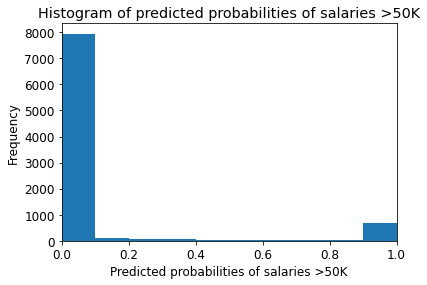

In [298]:


plt.rcParams['font.size'] = 12
plt.hist(y_pred1, bins = 10)
plt.title('Histogram of predicted probabilities of salaries >50K')


# set the x-axis limit
plt.xlim(0,1)


# set the title
plt.xlabel('Predicted probabilities of salaries >50K')
plt.ylabel('Frequency')

# ROC AUC

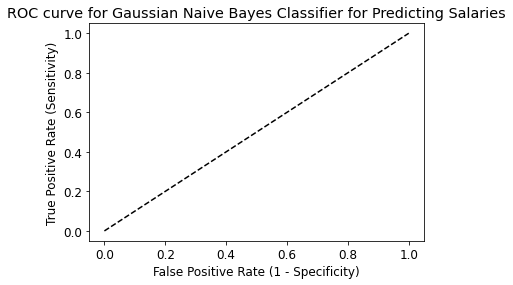

In [299]:
# plot ROC Curve

from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(Y_test, y_pred1, pos_label = '>50K')

plt.figure(figsize=(6,4))

plt.plot(fpr, tpr, linewidth=2)

plt.plot([0,1], [0,1], 'k--' )

plt.rcParams['font.size'] = 12

plt.title('ROC curve for Gaussian Naive Bayes Classifier for Predicting Salaries')

plt.xlabel('False Positive Rate (1 - Specificity)')

plt.ylabel('True Positive Rate (Sensitivity)')

plt.show()

compute ROC AUC

In [300]:

from sklearn.metrics import roc_auc_score

ROC_AUC = roc_auc_score(Y_test, y_pred1)

print('ROC AUC : {:.4f}'.format(ROC_AUC))

ROC AUC : 0.5793


# cross-validated ROC AUC 

In [301]:
from sklearn.model_selection import cross_val_score

Cross_validated_ROC_AUC = cross_val_score(classifier_gb, X_train, Y_train, cv=5, scoring='roc_auc').mean()

print('Cross validated ROC AUC : {:.4f}'.format(Cross_validated_ROC_AUC))

Cross validated ROC AUC : 0.8923


# Apply 10-Fold Cross Validation


In [302]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(classifier_gb, X_train, Y_train, cv = 10, scoring='accuracy')

print('Cross-validation scores:{}'.format(scores))

Cross-validation scores:[0.81676136 0.79829545 0.79014685 0.81288489 0.80388441 0.79062056
 0.80767409 0.7925154  0.79630507 0.80909522]


# Average cross-validation score

In [234]:
print('Average cross-validation score: {:.4f}'.format(scores.mean()))

Average cross-validation score: 0.8018


# Conclusion:
According to our Accurcy score which is 0.8023(Training set) & 0.7906(Test set).Looking at both the values is comparable & didn't see any over or underfitting signs.Also will check & compare model accuracy with differenet methods i.e confusion matrix, validations etc.

So we can conclude that Guassian naive bays classification model does well in predicting the class lables.